<h1><center> Math761 - HW 5 <br>
MC Integration and Importance Sampling </center> </h1>


### Exercise 1: Compare MC Integrals

Compute two MC estimates of

$$
\theta = \int_{0}^{0.5} e^{-x}dx.
$$

a) First, generate $\hat{\theta}$ by sampling from Uniform(0, 0.5) 10000 times, and also estimate the variance of $\hat{\theta}$. 

**Solution**
To generate $\hat{\theta}$ with monte carlo integration, consider:

$$E_f[h(x)]=\int_{x} h(x)f(x)dx$$

In this case we have $h(x) = e^{-x}$ and $f(x) = \frac{1}{0.5}$, since $x\sim Uniform(0, 0.5)$. Hence we will be really sampling:

$$E_f[h(x)]=\int_{0}^{0.5} e^{-x}\frac{1}{0.5}dx=\frac{1}{0.5}\int_{0}^{0.5} e^{-x}dx$$

Since we want $\int_{0}^{0.5} e^{-x}dx$:

$$ \int_{0}^{0.5} e^{-x}dx =E_f[h(x)]*0.5$$

We end up with the estimate $\hat{\theta}=0.3925$ and $Var(\hat{\theta}) = 0.0006$ 

In [1]:
# a) 
n = 10000
u = runif(n, 0, 0.5)
theta_hats = exp(-u)*(0.5)
theta_hat = mean(theta_hats)
se_hat = sqrt(var(theta_hats)/n)

In [2]:
se_hat; theta_hat

[1] 0.0005652426

[1] 0.3930745

b) Second, find another MC estimator $\tilde{\theta}$ by sampling from the exponential distribution 10,000 times, and also estimate the variance of $\tilde{\theta}$.

**Solution**

In this case we can use importance sampling, by sampling from $g(x)=exp(1)$. 

$$E_g[h(x)\frac{f(x)}{g(x)}]=\int_{x} h(x)f(x)\frac{g(x)}{g(x)}dx$$

$$E_g[h(x)\frac{f(x)}{g(x)}]=\int_{x} h(x)\frac{1}{0.5}dx$$

$$E_g[h(x)\frac{f(x)}{g(x)}]*0.5=\int_{x} h(x)dx$$

Here $h(x) = e^{-x}$ and $f(x) = \frac{1}{0.5}$.

Hence the weights are $w(i) = \frac{1/0.5}{g(x_i)} = \frac{2}{g(x_i)}$ and the estimate is: 

$$E_g[h(x)\frac{f(x)}{g(x)}] \approx \frac{1}{n} \sum_{i=1}^n w_i h(x_i) $$

Then we get: 
$$ \tilde{\theta} = 0.5* \frac{1}{n} \sum_{i=1}^n w_i h(x_i) $$

We end up with the estimate $\tilde{\theta}=0.3921$ and $Var(\hat{\theta}) = 0.0049$ 
Something interesting about this method is that it only returns ones and zeros when sampling from exp(1). The sample average ends up still estimating the integral well.

In [3]:
n = 10000
X = c()
weights = rep(NA, n)
theta_tildes = rep(NA, n)

for (i in 1:n){
    x = rexp(1, rate=1)
    # while (x>0.5) {
    #      x = rexp(1, rate=2)
    # }
    X[i] = x
    weights[i] = dunif(X[i], 0, 0.5)/ dexp(X[i], rate=1)#/ dexp(0.5, rate=2))
    theta_tildes[i] = weights[i]*exp(-1*X[i])*0.5
}

theta_tilde = mean(theta_tildes)
se_tilde = sqrt(var(theta_tildes)/n)

In [4]:
se_tilde; theta_tilde

[1] 0.004881768

[1] 0.3918

In [5]:
table(theta_tildes)

theta_tildes
   0    1 
6082 3918 

c) Create a side-by-side boxplot of the 10,000 runs of these two estimators.

**Solution**

See plot

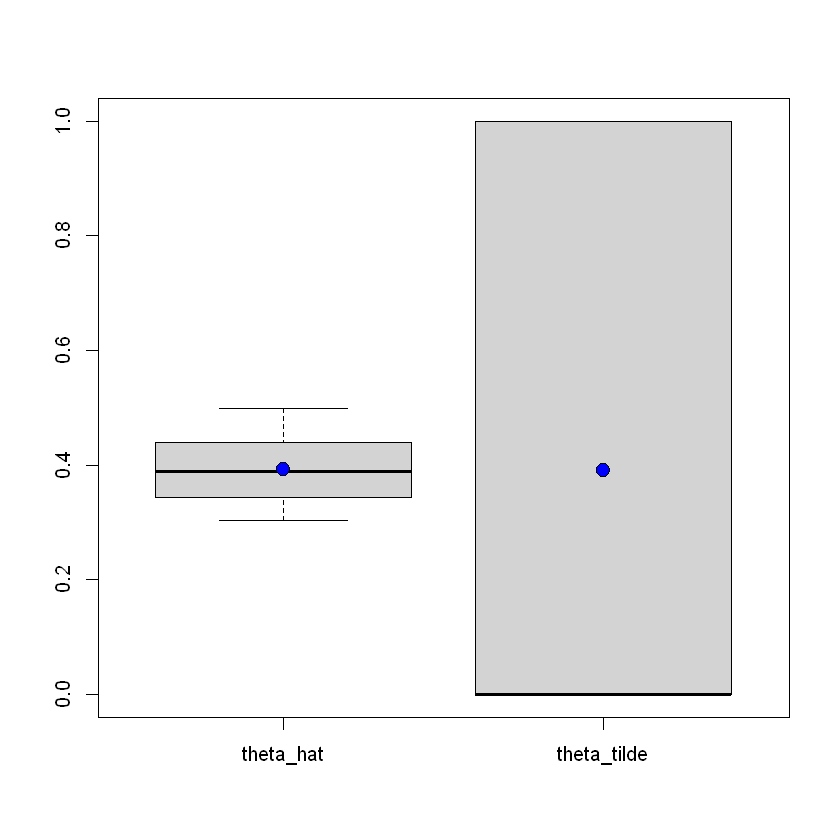

In [6]:
#c)
boxplot(theta_hats, theta_tildes, names = c("theta_hat", "theta_tilde"), ylim=c(0,1))
means = c(theta_hat, theta_tilde)                   # Store means
points(c(1,2), means, pch = 21, cex =1.5, bg = "blue")   # Label mean on boxplot

d) Compute the theoretical value of $\theta$.

**Solution**

We can find the theoretical value by manually performing the integration

$$\theta =\int_{0}^{0.5} e^{-x}dx =  -e^{-x}|_0 ^{0.5} = -e^{-0.5}+ e*0= -e^0.5 + 1 = 0.393469$$

In [7]:
1-exp(-0.5)

[1] 0.3934693

e) Which of the variances of  $\hat{\theta}$ and $\tilde{\theta}$ is smaller. Explain using the idea of efficiency.

**Solution**

The variance for $\hat{\theta}$ is smaller than the varaince for  $\tilde{\theta}$. Efficiency is a metric used to compare estimators and is defined as the ratio of the variances from two estimators. In this case, the efficiency is given by:

$$\frac{se_{\hat{\theta}}}{se_{\tilde{\theta}}} = \frac{0.00056524}{0.004881768} = 0.116 $$

Indicating $\hat{\theta}$ is more efficient that $\tilde{\theta}$. We can also clearly see this from the boxplot, where $\tilde{\theta}$ spans the range from $[0,1]$, while $\hat{\theta}$ has a much smaller spread of data.

In [10]:
eff = se_hat/se_tilde
eff

[1] 0.1157865

### Exercise 2: Importance Sampling

Obtain Monte Carlo estimates of 
$$
\int_{1}^{\infty} \frac{x^2}{\sqrt{2\pi}}e^{-x^2/2}dx
$$
by importance sampling.

a) For this, you must try out four different importance samplers. Use these two
   - $$g_1(x) = \frac{\sqrt{e}}{2}e^{-x/2} \text{ for x > 1 }$$
   
   - $$ g_2(x) = \frac{e^{1/2.88}}{1.44}xe^{-x^2/4} \text{ for x > 1}$$
   
   and also create two of your own. Please give the equations of your two functions. Also plot all four importance functions along with h(x)f(x) on a single plot.

**Solution**

The two equations I chose are:
   - $$g_3(x) = \frac{1}{2}e^{-x/4} \text{ for x > 1 }$$
   
   - $$ g_4(x) = \sqrt{e}e^{-x} \text{ for x > 1}$$

I really wanted to use $g(x) = \frac{x}{e} e^{-x^2/4}$ but it does not have an inverse cdf - I figured this out after approximately 10 attempts.

These were chosen due to their proximity to the target curve and ease of computation. See the plot below.


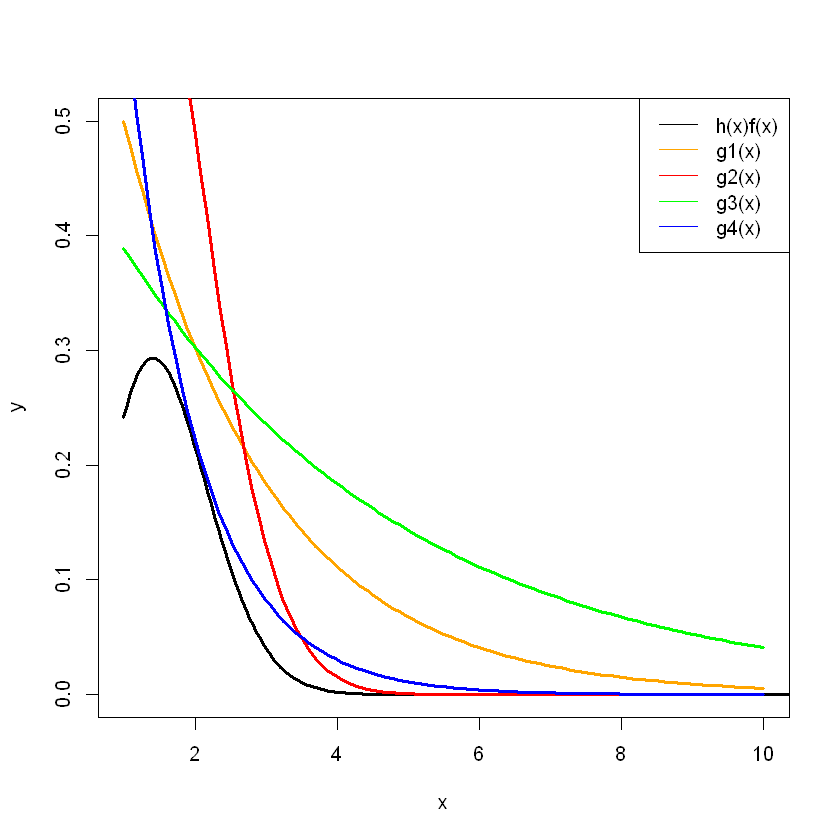

In [118]:
curve((x^2)*exp(-(x^2)/2)/(sqrt(2*pi)), 1, 50, n = 1000, xlim=c(1,10), ylim=c(0, 0.5), ylab = "y", lwd = 3)
curve(sqrt(exp(1))*exp(-x/2)/2, add=TRUE, col="orange", lwd = 3)
curve(exp(1/2.88)*x*exp(-(x^2)/2.88)/1.44, add=TRUE, col="red", lwd = 3)
curve(exp(-x/4)/2, add=TRUE, col="green", lwd = 3)
curve(sqrt(exp(1))*exp(-(x)), add=TRUE, col="blue", lwd = 3)
legend("topright", legend=c("h(x)f(x)", "g1(x)", "g2(x)", "g3(x)", "g4(x)"), col=c(1, "orange", "red", "green", "blue"),  lty=1)


b) Use all four $g_{i}(x)$ to obtain MC estimates of the integral, using a sample of 10000 for each importance function, and also report the estimated variance. Put both estimates and variances in a table. Which of your functions is best and why?

**Solution:**

Let $f(x) = \frac{1}{\sqrt{2\pi}}e^{-x^2/2}$ and $h(x) = x^2$

From the resulting table, we see that $g_2$ is the best estimator, followed by $g_4$, $g_3$, and $g_1$. This is due to how closely the curves follow the target distribution. $g_4$ diverges far from the target distribution on the left end, which likely accounts for the error. It is also very possible I made arithmatic errrors when calculating inverse cdfs :)

In [6]:
h_x <- function(x){
    return (x^2)
} 

First, use inverse transform to sample from $g_1(x)$:

$$g_1(x) = \frac{\sqrt{e}}{2}e^{-x/2} \text{ for x > 1 }$$

1. CDF

$$G_1(x) = \int_1 ^ x \frac{\sqrt{e}}{2}e^{-s/2} ds$$

$$G_1(x) =\sqrt{e} \int_1 ^ x \frac{1}{2}e^{-s/2} ds = -\sqrt{e}[e^{-s /2}]_1^x$$

$$= -\sqrt{e}[e^{-x /2} - e^{-1/2}] = -\sqrt{e}e^{-x /2} +1 = 1-\sqrt{e}e^{-x /2}$$

2. Inverse CDF

$$y=1-\sqrt{e}e^{-x /2}$$

$$\frac{1-y}{\sqrt{e}} = e^{-x /2}$$

$$ln(\frac{1-y}{\sqrt{e}} ) = -x/2$$

$$-2ln(\frac{1-y}{\sqrt{e}} ) = x$$

$$x=1-2ln(1-y)$$

Next, $g_2(x)$:

1. CDF

$$ g_2(x) = \frac{e^{1/2.88}}{1.44}xe^{-x^2/2.88} \text{ for x > 1}$$

$$ G_2(x) = \int_1^x \frac{e^{1/2.88}}{1.44}se^{-s^2/2.88} ds =  \int_1^x \frac{e^{1/2.88}}{1.44} se^{-s^2/2.88} ds $$

$$= e^{1/2.88}[e^{-s^2/4}]_1^x= e^{1/2.88}[e^{-x^2/2.88} - e^{-1/2.88}]$$

2. Inverse CDF

$$y =e^{1/2.88}[e^{-x^2/2.88} - e^{-1/2.88}]$$
$$\frac{y}{e^{1/2.88}} + e^{-1/2.88} = e^{-x^2/2.88}$$
$$ln(\frac{y}{e^{1/2.88}}) + ln(e^{-1/2.88}) = \frac{-x^2}{2.88}$$

$$x = \sqrt{2-2.88ln(y)}$$

Next, $g_3(x)$:

$$g_3(x) = \frac{x}{2}e^{-x^2/4} \text{ for x > 1 }$$

1. CDF

$$G_3(x) = \int_1^x\frac{1}{2}e^{-s/4} ds = \frac{-1}{2} [e^{-s/4}]|_1^x$$
$$= \frac{-1}{2} [e^{-x/4} - e^{-1/4}]$$

2. Inverse CDF

$$y = \frac{-1}{2} [e^{-x/4} - e^{-1/4}]$$

$$- 2y +e^{-1/4} = e^{-x^4}$$

$$\frac{-1}{4} - ln(2y) = -x/4$$

$$4 + 4ln(2y) = x$$

Finally, for $g_4(x)$:

$$ g_4(x) = \sqrt{e}e^{-x} \text{ for x > 1}$$

1. CDF:

$$G_4(x) = \int_1^x \sqrt{e}e^{-s} ds= \sqrt{e}\int_1^x e^{-s} ds$$

$$=-\sqrt{e}[e^{-x}]_1^x = -\sqrt{e}[e^{-x} - e^{-1}]$$

2. Inverse CDF:

$$y= -\sqrt{e}[e^{-x} - e^{-1}]$$

$$\frac{-y}{\sqrt{e}} + e^{-1}= e^{-x}$$
$$-(ln(y)-0.5) -1= -ln(y) -0.5= -x$$
$$ln(y) +0.5 = x$$

In [7]:
n = 10000
est_1 = rep(NA, n)
est_2 = rep(NA, n)
est_3 = rep(NA, n)
est_4 = rep(NA, n)

In [8]:
# g1
inv_g1 = function(u){
    return (1-2*log(1-u))
}

g1 = function (u) {
    return((sqrt(exp(1))/2)*exp(-u/2))
}

In [9]:
u = runif(n, 0, 1)
X = inv_g1(u)
weights = (dnorm(X))/g1(X)
est_1 = weights*h_x(X)

In [10]:
mean(est_1)

[1] 0.4002025

In [34]:
# g2
inv_g2 = function(u){
    return (sqrt(2-2.88*log(u)))
}

g2 = function(u){
    return((exp(1/2.88)/1.44)*u*exp((-u^2)/2.88))
}

In [35]:
X = rep(NA, n)
u = runif(n, 0, 1)
X = inv_g2(u)
weights = (dnorm(X))/g2(X)
est_2 = weights*h_x(X)

In [43]:
# g(3) 
inv_g3 = function(u){
    return ((4 + 4*log(2*u)))
}

g3 = function(u){
    return((u/2)*exp((-(u^2))/4))
}

In [44]:
u = runif(n, 0, 1)
X = inv_g3(u)
weights = (dnorm(X))/g3(X)
est_3 = weights*h_x(X)

In [45]:
inv_g4 = function(u){
    return(log(u)+0.5)
}

g4 = function(u){
    return(sqrt(exp(1))*exp(-u)) 
}

In [46]:
u = runif(n, 0, 1)
X = inv_g4(u)
weights = (dnorm(X))/g4(X)
est_4 = weights*h_x(X)
mean(est_4)

[1] 0.028011

In [47]:
res_1 = c(mean(est_1), sqrt(var(est_1)/n))
res_2 = c(mean(est_2), sqrt(var(est_2)/n))
res_3 = c(mean(est_3), sqrt(var(est_3)/n))
res_4 = c(mean(est_4), sqrt(var(est_4)/n))
results = data.frame(res_1, res_2, res_3, res_4, row.names=c("estimate", "variance"))
results

,res_1,res_2,res_3,res_4
,<dbl>,<dbl>,<dbl>,<dbl>
estimate,0.400563567,0.4050710537,0.065624919,0.028011002
variance,0.003017425,0.0006401261,0.002745248,0.000227502


## Exercise 3

Recall from class that it is possible to create estimates of $\Phi(x)= \int_{-\infty}^x \frac{1}{\sqrt{2\pi}} e^{-s^2/2} ds$ by generating random variables from $U(0,x)$.

a) Show the math that justifies how you can form an estimate of $\Phi(x)$ by using $U(0, x)$ random variables. Hint: this should look similar to the reasoning for the $U(a, b)$ example from class.

**Solution**

We can estimate $\Phi(x)$ from sampling from $U(0, x)$ similar to sampling from $U(0, 1)$. 

Recall that we are really estimating $E_{u(0,x)}[h(u)] = \int_{-\infty}^x  h(u)f(u)du$. In the case of $\Phi$, we set $h(u) = e^{-u^2/2}$ and $f(u) = \frac{1}{x}$ since $U\sim U(0,x)$. Then the integral becomes:

$$\int_{-\infty}^x e^{-u^2/2} \frac{1}{x} du = \frac{1}{x}\int_{-\infty}^x e^{-u^2/2} du$$

Then to get the integral we want, we must multiply by $x$:

$$\Phi(x)= 0.5 + \frac{1}{\sqrt{2\pi}} x E_{u(0,x)}[h(u)] = (\frac{1}{\sqrt{2\pi}} x) \frac{1}{n}(\sum_{i=1}^n h(u_i))$$

Thus we can form an estimate of $\Phi(x)$ by using $U(0, x)$ random variables by sampling from $u_i\sim U(0,x)$, taking the sample mean of $h(u)$ where $h(u) = e^{-u^2/2}$, multiplying by $x$ and $\frac{1}{\sqrt{2\pi}}$, and adding 0.5 to account for the area from $(-\infty, 0)$.


b) Estimate $\Phi(x)$ for a sequence of 10 equally spaced $x$ values from $-2.5$ to $-.1$ and 10 equally spaced $x$ values from from $.1$ to $2.5.$ Then plot these values as a line plot.

**Solution**

Note that for the $-2.5$ to $-.1$ case, we must sample from unif(x, 0). See the plots below, which include one for the negative x values, one for the positive x values, and one plot with both together.

In [19]:
hx = function(u){
        exp((-(u)^2)/2)
}

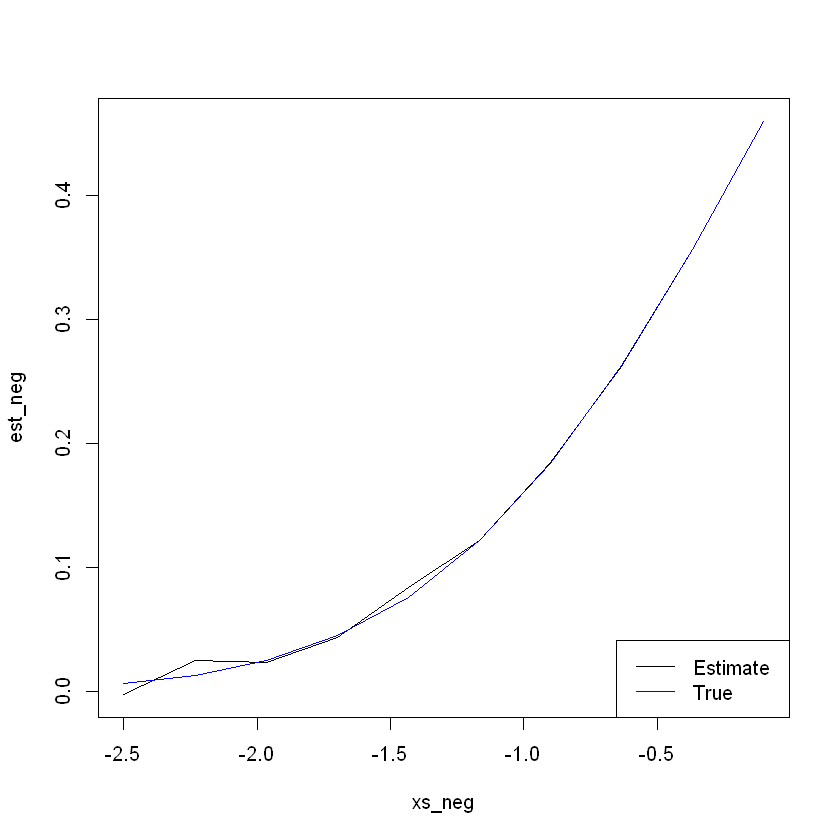

In [20]:
xs_neg = seq(-2.5, -0.1, length.out=10)
n = 1000
est_neg = rep(NA, length(xs_neg))
true_neg = rep(NA, length(xs_neg))

for (i in 1:length(xs_neg)){
    x = xs_neg[i]
    u = runif(n, min=x, max=0)
    est_neg[i] = 0.5 + x*mean(hx(u))*(1/sqrt(2*pi)) 
    true_neg[i] = pnorm(x)
}
plot(xs_neg, est_neg, 'l')
lines(xs_neg, true_neg, col="blue")
legend("bottomright", legend=c("Estimate", "True"), col = c("black", "blue"), lty=1)

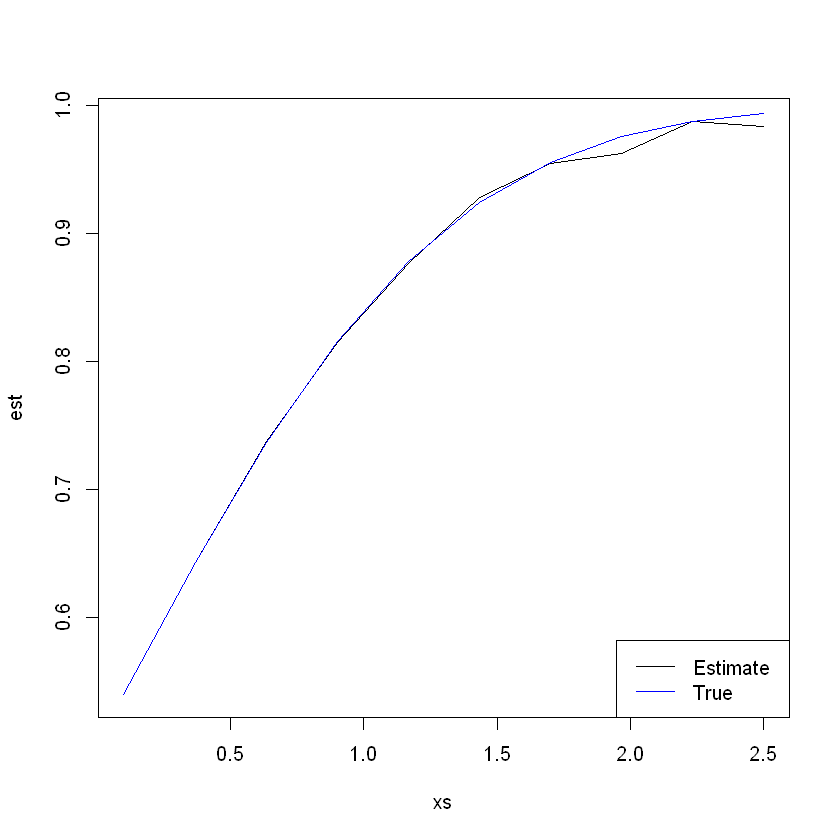

In [21]:
xs = seq(0.1, 2.5, length.out=10)
n = 1000
est = rep(NA, length(xs))
true = rep(NA, length(xs))
for (i in 1:length(xs)){
    x = xs[i]
    u = runif(n, min=0, max=x)
    est[i] = 0.5 + x*mean(hx(u))*(1/sqrt(2*pi))
    true[i] = pnorm(x)
}

plot(xs, est, 'l')
lines(xs, true, col="blue")
legend("bottomright", legend=c("Estimate", "True"), col = c("black", "blue"), lty=1)

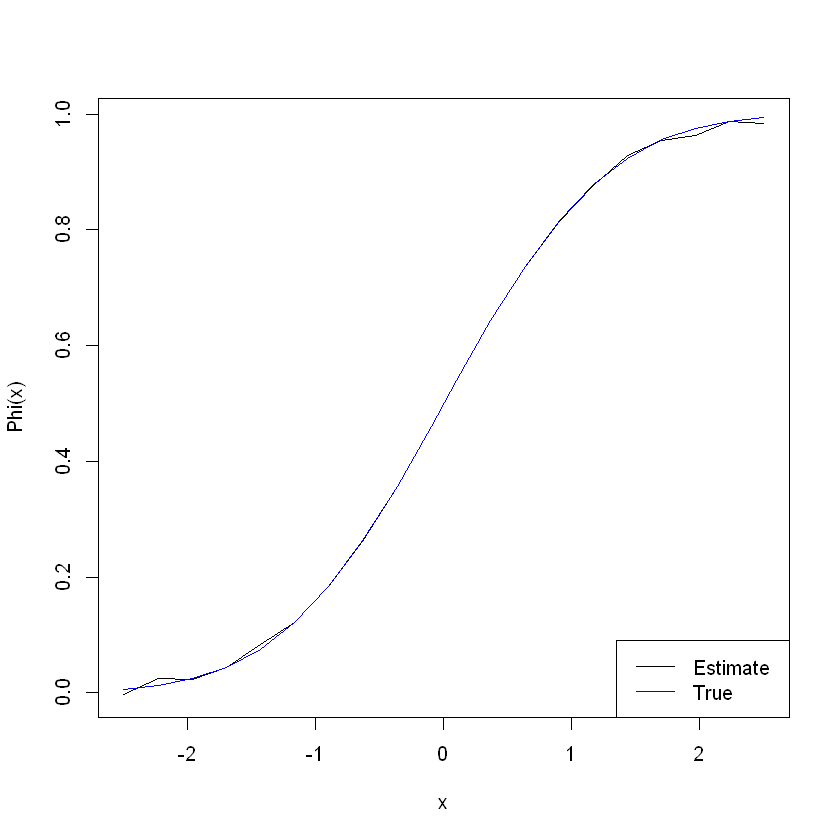

In [24]:
plot(c(xs_neg, xs), c(est_neg, est), 'l', xlab="x", ylab="Phi(x)")
lines(c(xs_neg, xs), c(true_neg, true), col="blue")
legend("bottomright", legend=c("Estimate", "True"), col = c("black", "blue"), lty=1)